# **PROJECT OF MULTI AGENT REINFORCEMENT LEARNING (MARL)**

Quantitative Life Sciences Diploma - 2024

Name: Cristopher Erazo

Proffesors: Antonio Celani & Emanuele Panizon 

# **THEORETICAL PART**

## **The single-agent case**

**Formal Description**

The formal model for a single-agent reinforcement learning problem is the (finite) Markov Decision Process (MDP) which has the following ingredients: 

* $\mathcal{S}$ finite set of environment states.
* $\mathcal{A}$ finite set of actions.
* $p(s'|s,a)$ state transition probability.
* $r(s,a)$ reward function.
* $\pi(a|s)$ policy.

The state $s_t \in \mathcal{S}$ describes the environment at each time step $t$. The agent then observes the environment and takes an action $a_t \in \mathcal{A}$ according to the policy $\pi(\cdot|s_t)$. As a result, the environment changes its state to  $s_{t+1} \sim p(\cdot|s_t,a_t)$ and the agent receives a reward $r_{t+1} = r(s_t,a_t)$. The reward evaluates the immediate effect of the action $a_t$ but it tells nothing about the long-term effects of the action.

To consider an *overall* metric for the reward we can use the **value function**

$V^{\pi}(s) = \mathbb{E}\left[\displaystyle\sum_{t=0}^\infty \gamma^t r_{t+1}| S_0 = s , \pi \right]$

where the expectation is taken over the probabilitstic state transitions under the policy $\pi$ and $\gamma \in [0,1)$ is the discount factor. The value function estimates all the future rewards accumulated by the agent, starting from state $s$ and following the policy $\pi$ and the discount factor $\gamma$ accounts for the uncertainty about the rewards that will be obtained in the future or can also be interpreted as a continuing probability that defines an average time horizon for the process $T = \dfrac{1}{1-\gamma}$.

**Goal of single agent RL**

The goal of reinforcement learning is to find a policy $\pi$ that maximizes the **objective function $G(\pi)$** defined as: 

$G(\pi) = \mathbb{E}\left[ V^{\pi}(s_0)|s_0 \sim \rho_0 \right] = \mathbb{E}\left[\displaystyle\sum_{t=0}^\infty \gamma^t r(S_t,A_t)| \pi,\rho_0 \right]$ for a initial distribution of states $\rho_0$. 

The task of the agent is then to maximize its long-term performance (objective) while only receiving feedback about its immediate performance (reward). The general way to achieve this is with the **state-action value function**

$Q^{\pi}(s,a) = \mathbb{E}\left[\displaystyle\sum_{t=0}^\infty \gamma^t r_{t+1}| S_0 = s, A_0=a , \pi \right]$

and we can see the relation $V^{\pi}(s) = \displaystyle\sum_{a\in\mathcal{A} }\pi(a|s)Q^{\pi}(s,a)$. 

The optimal Q-function is defined as $Q^*(s,a) = \displaystyle\max_{\pi}Q^{\pi}(s,a)$ and satisfies the Bellman optimality equation: 

$Q^*(s,a) = \displaystyle\sum_{s', a'} p(s'|s,a)\pi(a'|s')\left( r(s,a)+\gamma \displaystyle\max_{a''}  Q^*(s',a'')\right)$

$Q^*(s,a) = \displaystyle\sum_{s'} p(s'|s,a)\left( r(s,a)+\gamma \displaystyle\max_{a'}  Q^*(s',a')\right)$

and in an analogous way: 

$V^*(s) = \displaystyle\max_a Q^*(s,a)=\displaystyle\max_a \displaystyle\sum_{s'} p(s'|s,a)\left( r(s,a)+\gamma V^*(s) \right)$

Once we have $Q^*(s,a)$ or $V^*(s)$, the optimal policy is the one that maximizes the value for each state. 

$\pi^*(a|s) = \arg \displaystyle \max_{a}Q^*(s,a) = \arg \displaystyle\max_a \displaystyle\sum_{s'} p(s'|s,a)\left( r(s,a)+\gamma V^*(s) \right)$

**Different perspectives and algorithms**

We can see that if we know the model ($p(s'|s,a)$ and $r(s,a)$) we can perform for example a value iteration with the Bellman equation and it is guaranted that we will converge to the optimal value function $V^*(s)$ with which we can find the optimal policy $\pi^*$. 

This is a **model based** perspective because requires full knowledge of the environment and also will be a **critic - only** method because relies exclusively on value function approximation that will hopefully prescribe a near-optimal policy. 

In the case that the model is not avaliable the only thing we have is empirical data collected from interactions with the environment. In the **model - free** one of the most powerfull algorithms is called **Q-learning** which uses the information obtained from the trajectory   $\cdots,S_t,A_t,R_{t+1},S_{t+1},A_{t+1},\cdots$ to construct and update an estimate of the $Q$ function based on the Bellman's Optimality Equation that will eventually converge to the optimal solution. 

$\hat{Q}(S_t,A_t) \leftarrow \hat{Q}(S_t,A_t) + \alpha_t \left[R_{t+1} + \gamma \displaystyle\max_a \hat{Q}(S_{t+1},a) - \hat{Q}(S_t,A_t)\right]$

Note that at each step $t$, the only entry of the estimator $\hat{Q}$ that is updated is the one corresponding to the state and action actually observed $(S_t,A_t)$, the other ones remain unchanged. The term in the square brackets is called **temporal difference** and is the difference between the current estimate $\hat{Q}(S_t,A_t)$, and the update estimate $R_{t+1} + \gamma \displaystyle\max_a \hat{Q}(S_{t+1},a)$. This update estimate is a sample of the right-hand side of the Bellman equation applied to $\hat{Q}$ in the pair $(S_t,A_t)$. The learning rate $\alpha_t$ can be time varying and usually decreases with time. 

The sequence of estimators probably converges to $Q^*$ if: 

* The sum $\displaystyle\sum_{t=0}^{\infty} \alpha_t^2$ converges while $\displaystyle\sum_{t=0}^{\infty} \alpha_t$ is infinite
* Asymptotically, all the state-action pairs are visited infinitely often.

If during the evolution of the episodes, while learning $Q$, we construct the policy based on $Q$ (e.g. $\epsilon$ greedy) we are styll in a **critic - only** method.

The other face of the coin are the so called **actor - only** methods that are focused entierly on the policies. They work with a parametrized family of policies $\pi_\theta$ and therefore the objective function becomes also a function of the parameters $\theta$. In this setting, the gradient $\nabla_\theta G(\pi_\theta)$ is estimated directly from the simulation and then evaluated to update the parameters in the direction of improvement. 

In this branch of reinforcement learning, a key result is the **Policy Gradient Theorem** which basically gives a way to write the gradient of the objective function in a closed way: 

$\nabla_\theta G(\pi_\theta) = \mathbb{E}_\pi\left[ \nabla_\theta \log \pi_\theta(A|S) \left( Q^\pi(S,A)-V^\pi(S) \right)\right]$

and we can evaluate a sample of it with estimations of the value functions at each step.

## **The multi-agent case**

**Direct Generalization**

The generalization of the Markov Decision Process for the multi-agent case is the *stochastic game* with the following ingredients: 

* $N$ agents.
* $\mathcal{S}$ finite set of environment states.
* $\mathcal{A_n}$ finite set of actions for agent $n$.
* $p(s'|s, \mathbf{a})$ state transition probability with $\mathbf{a} \in \displaystyle\prod_n\mathcal{A}_n$ being the joint action.
* $r_n(s,\mathbf{a})$ reward function for agent $n$ that depends on the joint action taken.

The policy of each agent is $\pi^n(a_n|s)$ with $a_n \in \mathcal{A_n}$ and they form the joint policy $\boldsymbol{\pi}(\mathbf{a}|s) = \displaystyle\prod_n \pi^n(a_n|s)$. 

In this setting, the objective function for each agent is: 

$G_n(\boldsymbol{\pi})  = \mathbb{E}\left[\displaystyle\sum_{t=0}^\infty \gamma^t r_n(S_t,\mathbf{A}_t)| \boldsymbol{\pi},\rho_0  \right]$ and it depends on the joint action and policy. 

We can also define the state-action value function for each agent as before: 

$Q^{\boldsymbol{\pi}}_n(s,\mathbf{a}) = \mathbb{E}\left[\displaystyle\sum_{t=0}^\infty \gamma^t r_n(S_t,\mathbf{A}_t)| S_0 = s, \mathbf{A}_0 = \mathbf{a}, \boldsymbol{\pi} \right]$ that also depends on the joint action and policy. 

**Static Games - Game Theory** 

A static game is a stochastic game that has no states and no dynamics ($\mathcal{S} = \emptyset$). This static games are described only by the set of actions $\mathcal{A_n}$ and the reward function of each agent $r_n(\mathbf{a})$ that now only depends on the joint action. The policy of each agent becomes a mixed strategy $\pi^n(a_n)$ as in the context of **Game Theory**. 

In this same context, the expected utility for player $n$ given the strategy profile $(\pi^1, \cdots , \pi^n)$ is: 

$u_n(\boldsymbol{\pi}) = \mathbb{E}\left[r_n(\mathbf{a}) | \boldsymbol{\pi}\right]$ where $\boldsymbol{\pi}(\mathbf{a}) = \displaystyle\prod_n\pi^n(a_n) $ is the joint strategy. 

In this context, for the following steps, it is usefull to write down the explicit dependance of the expected utility of player $n$ on its own strategy $\pi^n$ and the set of strategies of the opponents $(\pi^{n'})_{n' \neq n}$. For this purpose we will follow the convension in game theory and denote $\pi^n(a_n)$ the strategy of agent $n$ and $\boldsymbol{\pi}^{-n}(\mathbf{a}_{-n}) = \displaystyle\prod_{n' \neq n} \pi^{n'}(a_{n'})$ where in general the index ${-n}$ reffers to all the other agents appart from $n$.

In this way: 

$u_n(\boldsymbol{\pi}) = u_n(\pi^n , \boldsymbol{\pi}^{-n}) =\displaystyle\sum_{a_n,\mathbf{a}_{-n}} r_n(a_n,\mathbf{a}_{-n}) \pi^n(a_n) \boldsymbol{\pi}^{-n}(\mathbf{a}_{-n})$


Many MARL algorithms are designed for static games or work on a stage-wise fashion because a stage game is the static game that arises in a certain state of a stochastic game. The reward functions in state $s$ are the $Q$ functions of the stochastic game projectected in the action space when the state is fixed. The agent's strategy for the stage game arising from some state $s$ of the stochastic game is the projection of its policy on the action space when the state is fixed. In general MARL algorithms learn strategies for each state in a stage-wise fashion and then aggregate the strategies to obtain the overal policy. This is the main conection between MARL and Game Theory and that is why is important to study the simplest examples in static games as an introduction. 

A very important concept in Game Theory is that of a **Nash Equilibrium** and to properly define it we need to introduce what is known as the **best respose**. The best response for agent $n$ is: 

$BR^n(\boldsymbol{\pi}^{-n}) = \arg\displaystyle\max_{\pi^n} u_n(\pi^n , \boldsymbol{\pi}^{-n}) $

which basically indicates us the best way to take actions for a given set of strategies of the other agents. 

The strategy profile $(\pi_*^1, \cdots , \pi_*^n)$ is a **Nash Equilibrium** if   $\pi^n_* = BR^n(\boldsymbol{\pi}_*^{-n})$  $\forall n$ which means that this equilibrium defines a status quo from which no agent has incentive to deviate as long as all the others think in the same way. The Nash Theorem indicates that in static games there always exists at least one Nash equilibrium in mixed strategies and many MARL algorithms are constructed to converge to this equilibrium. 

This result also indicates the importance of mixed (stochastic) strategies and therefore policies in MARL instead of deterministic policies that can be applied normally in single agent RL. The stochastic policies are neccesary to express certain concepts such as Nash equilibrium. 



**Benefits and Challenges of MARL**

**Benefits:**
* Experience sharing can help agents with similar tasks to learn faster.
* MARL can be realized with parallel computation since the task is descentrelized.
* MARL is more robust because when one agent fails other one can take over some of the tasks.

**Challenges:**
* Course of dimensionality more severe because of the exponential growth in the state-action space with the number of agents.
* Specifying a good goal in MARL is difficult. The agent returns are correlated and cannot be maximized independently.
* Nonstationaty arises in MARL because all the agents learn simultaneously. Each agent faces a moving-target learning problem.

**MARL Goal**

Specifying a good general MARL goal is challenging because the agent's returns are different and correlate. In the literature, the goals are generaly tracked within two edges: **Stability** and **Adaptation**. Stability basically implies the convergence to a stationary policy and adaptation ensures that the performance is mantained or improved as the other agents change their policies. 

**Stability:** Convergence to equilibria is a common stability requirement. Nash equilibria are the most frequently used, but there is not a concensus in weather it is usefull. A normal objection is that the relation between stage-wise convergence and convergence in the stochastic game is still unclear. 

**Adaptation:** One adaptation criteria is rationality which requires that the learner converges to a best response equilibria if the others remain stationary. In this cases, even if a Nash equilibrium is not explicitly required it arises naturally when combining convergence and rationality. Another adaptation technique is called no-regret which means that the agent achieves a return that is at least as good as any stationary strategy. 

Some other properties can be related to stability and adaptation. For example, opponent-independent algorithms converges to a stable strategies regardless of what the other agents are doing, meanwhile, opponent-aware algorithms lean models of the other agents and and use them un some way of best response and is related to adaptation. 

In general a good combination of both axis should be designed according to each problem. Stability is needed because stable agents are simpler to analize and have more meaningful performance guarantees. Adaptation is needed because the behaviour of other agents is generally unpredictable. Since perfect stability and adaptation cannot be achieved simultaneously, a MARL goal should include bounds on both stability and adaptation measures during the transient performance and in the asymptotic limits.

**MARL Algorithms**

The classification of MARL algorithms encompasses several dimensions and in a simplified way can be can be separated by task type (coordination, competition, mixed) and degree of awareness of other agents (independent, tracking, aware). 

**Fully cooperative tasks**

In this case all the agents have the same reward function $(r_1=\cdots=r_n)$ and the trivial learning goal is to maximize the common objective function (distounted reward). This is reduced to a MDP if a centralized controller is avaliable $\pi(a_1,\cdots,a_n|s)$ and the goal could be achieved for example by learning the optimal state-action value function with Q learning.

In this case, complications might arrise due to the fact that for some states, multiple joint actions may be optimal and in absence of coordination mechanisms, the agents might break the ties in different ways resulting in a suboptimal joint action. Several solutions are proposed: 
* Team Q learning: avoids coordination assuming that the optimal joint actions are unique (not always true).
* Distributed Q learning: solves cooperation without assuming coordination, only workks in deterministic problems with non-negative rewards. 
* Coordination based: when global Q functions can be decomposed additively into local Q functions of subset of agents.
* Indirect coordination methods: can be for static or dynamical tasks. 

**Fully competitive tasks**

In this case (for $N=2$ is equivalent to $r_1 = -r_2$) the minimax principle can be applied: maximize your benefit under the worst case assumption that the opponent will always try to minimize it. This priciple suggests a opponent-independent algorithm.

* Minimax Q: similar to Q learning introducing minimax operator.

**Mixed tasks**

In this case there are no constrains imposed on the reward functions of the agents which means that this model is designed for self-interested, but not necessarily competing agents. Here the influence of Game Theory concepts is the strongest. 

* Sigle - agent RL: In this setting, algorithms for single agents like Q-learning can be applied directly because with the basic update rule without being aware of the other agents. This approach is limited because the nonstationarity of the problem invalidates most of the single-agent RL theoretical guarantees, nonetheless, it has a significant number of applications because of its simplicity.
* Agent - independent methods: Nash Q-learning modifies the Q-learning update rule to include a convergence to equilibrium (probabli Nash) in each state.
* Agent - tracking methods: Estimate models of the other agents strategies or policies and act using some form of best respose.
* Agent - aware methods: They target convergence as well as adaptation to other agents.

## **Aplication to Matrix Games**

**Natural policy gradient with softmax**

For the numerical application we will study a matrix game problem (in general a mixed task) where the goal is for each agent to maximize its own expected utility. This goal steps into the adaptation side because we will not require stability criteria, although we will see that in some examples we also achieve convergence to Nash equilibria.

With this general goal in mind, the simpler way to implement it is with an agent-independent algorithm because each agent will always act in its best interest regardless of the behaviour of the others. The algorithm we are going to use is a traditional natural policy gradient like in the single agent case with a softmax parametrization. 

The setup of the problem goes as follows: 

$N$ independent agents with finite action sets $\mathcal{A_n}$. The reward funcion of each agent is $r_n(\mathbf{a})$ and depends on the joint action $\mathbf{a}$. Each agent takes actions independently according to its own policy that we will parametrize as: 

$\pi^n_{\theta^n}(a) = \dfrac{e^{\theta^n_a}}{\displaystyle\sum_{a'\in\mathcal{A}_n} e^{\theta^n_a}}$     where     $\theta^n = (\theta^n_a)_{a \in \mathcal{A_n}}$   is the set of parameters associated to the policy of agent $n$.

The goal for each agent is to maximize its expected utility: 

$u_n(\boldsymbol{\theta})=u_n(\theta^n,\boldsymbol{\theta}^{-n}) = u_n(\pi^n_{\theta^n} , \boldsymbol{\pi}^{-n}_{\boldsymbol{\theta}^{-n}}) =\displaystyle\sum_{a_n,\mathbf{a}_{-n}} r_n(a_n,\mathbf{a}_{-n}) \pi^n_{\theta^n}(a_n) \boldsymbol{\pi}^{-n}_{\boldsymbol{\theta}^{-n}}(\mathbf{a}_{-n})$

We can see that the utility of agent $n$ depends not only on its parameters $\theta^n$, but also on the set of parameters of all the other agents $\boldsymbol{\theta}^{-n}$. Nonetheless, each agent can only modify its own behaviour and therefore the maximization should be done varying only its parameters while the others are fixed. 

The update rule for the parameters will follow the natural gradient: 

$\theta^n_a  \;\;  \leftarrow \;\; \theta^n_a  + \eta \tilde{\nabla}_{a}u_n(\theta^n)$    where    $\tilde{\nabla} = \mathbb{J}^{-1}\nabla$ is the natural gradient and $\mathbb{J}$ is the Fisher matrix of the policy and $\eta$ is the learning rate ($\tilde{\nabla}_{a} \equiv \tilde{\nabla}_{\theta^n_a}$)

If we apply the natural gradient to the expected utility we will obtain: 

$\tilde{\nabla}_{a}u_n(\theta^n) = \tilde{\nabla}_{a} \left[ \displaystyle\sum_{a_n,\mathbf{a}_{-n}} r_n(a_n,\mathbf{a}_{-n}) \pi^n_{\theta^n}(a_n) \boldsymbol{\pi}^{-n}_{\boldsymbol{\theta}^{-n}}(\mathbf{a}_{-n}) \right] = \displaystyle\sum_{a_n,\mathbf{a}_{-n}} r_n(a_n,\mathbf{a}_{-n}) \left[\tilde{\nabla}_{a} \pi^n_{\theta^n}(a_n) \right]\boldsymbol{\pi}^{-n}_{\boldsymbol{\theta}^{-n}}(\mathbf{a}_{-n})$

where the natural gradient gets only applyed to the $n$ policy and thanks to the softmax parametrization we obtain a very simple expression for the natural gradient of the policy as $\tilde{\nabla}_{a} \pi^n_{\theta^n}(a_n) = \delta_{a,a_n}$ that simplifies one of the sums in the expected value giving: 

$\tilde{\nabla}_{a}u_n(\theta^n)\equiv u^n(a,\boldsymbol{\pi}^{-n}) = \displaystyle\sum_{\mathbf{a}_{-n}} r_n(a,\mathbf{a}_{-n}) \boldsymbol{\pi}^{-n}_{\boldsymbol{\theta}^{-n}}(\mathbf{a}_{-n}) = \mathbb{E}\left[r^n(a,\mathbf{A}_{-n}) | \boldsymbol{\pi}^{-n}\right]$

which is basically the average reward the $n-th$ agent will obtain with the action $a$ given the profile of strategies of the other agents $\boldsymbol{\pi}^{-n}$. The notation $u^n(a,\boldsymbol{\pi}^{-n})$ is used to emphasize this double dependency. 

The final update rule for the parameters is: 

$\theta^n_a  \;\;  \leftarrow \;\; \theta^n_a  + \eta \; u^n(a,\boldsymbol{\pi}^{-n})$

The great advantage of the softmax parametrization along with the natural gradient in this case is that now is very easy to construct an estimator of the gradient based on samples: if in a given step, agent $n$ plays action $A_n$ when the other agents play the joint action $\mathbf{A}_{-n}$, the estimator of the gradient will be: 

$\widehat{\tilde{\nabla}_{a}u_n} = r_n(A_n,\mathbf{A}_{-n})$   and the  update rule becomes: 

The final update rule for the parameters is: 

$\theta^n_a  \;\;  \leftarrow \;\; \theta^n_a  + \eta \; r_n(A_n,\mathbf{A}_{-n}) \mathbb{1}(A_n=a)$

**Replicator dynamics**

From a parallel point of view, we can check what is the update rule for the policy $\pi^n_{\theta^n}(a)$ instead of just its parameters.

$\pi^n_{\theta^n}(a)  \;\;  \leftarrow \;\;  \dfrac{e^{\theta^n_a  + \eta \; u^n(a,\boldsymbol{\pi}^{-n})}}{\displaystyle\sum_{a'\in \mathcal{A_n} } e^{\theta^n_{a'}  + \eta \; u^n(a',\boldsymbol{\pi}^{-n})}} \approx \dfrac{e^{\theta^n_a}\left(1 + \eta \; u^n(a,\boldsymbol{\pi}^{-n})\right) }{\displaystyle\sum_{a'\in \mathcal{A_n} } e^{\theta^n_{a'}}\left(1 + \eta \; u^n(a',\boldsymbol{\pi}^{-n})\right)}=$

$=\dfrac{e^{\theta^n_a}\left(1 + \eta \; u^n(a,\boldsymbol{\pi}^{-n})\right) }{\displaystyle\sum_{a'\in \mathcal{A_n} } e^{\theta^n_{a'}} + \eta \; \displaystyle\sum_{a'\in \mathcal{A_n} } e^{\theta^n_{a'}}\; u^n(a',\boldsymbol{\pi}^{-n})} = \pi^n_{\theta^n}(a)  \dfrac{1 + \eta \; u^n(a,\boldsymbol{\pi}^{-n})}{1 + \eta \; u^n(\boldsymbol{\pi})} \approx \pi^n_{\theta^n}(a)  \left( 1 + \eta \; u^n(a,\boldsymbol{\pi}^{-n}) -\eta\; u^n(\boldsymbol{\pi})\right)$

In summary, the update rule is: 

$\pi^n_{\theta^n}(a)  \;\;  \leftarrow \;\; \pi^n_{\theta^n}(a)  + \eta \; \pi^n_{\theta^n}(a) \left[ u^n(a,\boldsymbol{\pi}^{-n}) - u^n(\boldsymbol{\pi})\right]$

which in the continuos limit $\eta \rightarrow 0$ recovers the structure of the replicator dynamics: 

$\dfrac{d \pi^n(a)}{dt} = \pi^n(a) \left[u^n(a,\boldsymbol{\pi}^{-n}) - u^n(\boldsymbol{\pi}) \right]$

that is a set of equations found in Evolutionary Game Theory that describes the evolution of a population of individuals with different fitnesses.

# **NUMERICAL PART**

## **Libraries and Functions**

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

In [185]:
def R(n,a,r): 
    '''
    Get the return of agent n={0,1} when the joint action
    a = (a0,a1) is taken given the list of payoff matrices r. 
    '''
    rn = r[n]
    a0 , a1 = a
    return rn[a0,a1]

def get_policy(theta): 
    # The common shift in the parameters does not change probabilities
    log_p = theta - np.mean(theta)
    # We clip very large or small values to prevent overflow
    log_p = np.clip(log_p,-20,20)
    p = np.exp(log_p)
    p = p/np.sum(p)
    return p

def get_action(p,Na): 
    return np.random.choice(Na,p=p)


def derivative_p(p,r): 
    p0 , p1 = p[0],p[1]
    r0 , r1 = r[0],r[1]
    dp0 = p0*(np.matmul(r0,p1) - np.dot(p0,np.matmul(r0,p1)))
    dp1 = p1*(np.matmul(r1,p0) - np.dot(p1,np.matmul(r1,p0)))
    return np.array([dp0,dp1])


def update_param(N,A,R,theta,lr):
    for n in range(N): 
        a = A[n]
        r = R[n]
        theta_n = theta[n]
        theta_n[a] += lr*r
    return theta




In [240]:
def plot_matching_pennies(Pdat): 
    N_steps,N,_ = Pdat.shape
    fig , axes = plt.subplots(nrows=N,sharex=True,figsize=(7,4),layout='constrained')
    lab = [r'$\pi(H)$',r'$\pi(T)$']
    tit = [f'Even Player',f'Odd Player']
    col = ['green','blue']
    for n in range(N): 
        ax = axes[n]
        ax.set_ylabel(tit[n]+f'\n Probabilities',size=14)
        ax.grid(linewidth=0.7,color='black',linestyle='--',alpha=0.3)
        ax.set_xlim(0,N_steps)
        ax.set_ylim(0,1)
        pn = Pdat[:,n,:]
        for i , lb in enumerate(lab): 
            ax.plot(pn[:,i],label=lb,color=col[i])
        ax.legend(fontsize=12,ncols=2,loc=1)
    axes[-1].set_xlabel(f'Number of iterations',size=14)
    fig.suptitle(f'Matching Pennies Game',size=15)
    return fig , axes

def plot_matching_pennies_space(Pdat): 
    N_steps,N,_ = Pdat.shape
    fig , ax = plt.subplots()
    # Head probability for both players
    P0 = Pdat[:,0,0]
    P1 = Pdat[:,1,0]
    ax.plot(P0,P1,color='green',alpha=0.8)
    ax.scatter(P0[0],P1[0],color='blue',s=40,marker='o',label='Initial Condition')
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    ax.grid(linewidth=0.7,color='black',linestyle='--',alpha=0.3)
    ax.set_xlabel(r'Even Player $\pi^0(H)$',size=14)
    ax.set_ylabel(r'Odd Player $\pi^1(H)$',size=14)
    ax.legend(fontsize=13,loc=2)
    return fig , axes

def plot_matching_pennies_multi(PDAT): 
    N_steps,N,_ = PDAT[0].shape
    Nit = len(PDAT)
    fig , ax = plt.subplots()
    c0 = [0,0.8,0]
    col = range_colors(c0,Nit,lb=0.9,lw=0.7)
    for i , Pdat in enumerate(PDAT):
        # Head probability for both players
        P0 = Pdat[:,0,0]
        P1 = Pdat[:,1,0]
        ax.plot(P0,P1,color=col[i],alpha=0.8)
        ax.scatter(P0[0],P1[0],color=col[i],s=40,marker='o')
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    ax.grid(linewidth=0.7,color='black',linestyle='--',alpha=0.3)
    ax.set_xlabel(r'Even Player $\pi^0(H)$',size=14)
    ax.set_ylabel(r'Odd Player $\pi^1(H)$',size=14)
    # ax.legend(fontsize=13,loc=2)
    return fig , axes

def plot_compare_RD(P_DAT,Nit):
    c0 = [0,0.8,0]
    col = range_colors(c0,Nit,lb=0.9,lw=0.7)
    tit = [r'NPG with $\eta=0.005$',r'NPG with $\eta=0.001$',r'Replicator Dynamics']
    fig , axes = plt.subplots(ncols=3,nrows=1,figsize=(11,4),layout='constrained',sharey=True)
    for j , ax in enumerate(axes): 
        PDAT = P_DAT[j]
        for i in range(Nit):
        # Head probability for both players
            P0 = PDAT[0,i,:]
            P1 = PDAT[1,i,:]
            ax.plot(P0,P1,color=col[i],alpha=0.8)
            ax.scatter(P0[0],P1[0],color=col[i],s=40,marker='o')
        ax.set_ylim(0,1)
        ax.set_xlim(0,1)
        ax.grid(linewidth=0.7,color='black',linestyle='--',alpha=0.3)
        ax.set_xlabel(r'Even Player $\pi^0(H)$',size=14)
        ax.set_title(tit[j],size=16)
    axes[0].set_ylabel(r'Odd Player $\pi^1(H)$',size=14)
    # ax.legend(fontsize=13,loc=2)
    return fig , axes

def range_colors(c0,num,lb=0.5,lw=0.5):
    C0 = np.array(c0)
    B = np.array([0,0,0])
    W = np.array([1,1,1])
    nb = int(0.5*lb*num/lw)
    nw = num - nb
    colors = []
    tb = np.linspace(0,1,nb)
    for t in tb: 
        Ct = (1-lb+t*lb)*C0 + (1-t)*lb*B
        colt = (Ct[0],Ct[1],Ct[2])
        colors.append(colt)
    tw = np.linspace(0,1,nw+1)[1:]
    for t in tw: 
        Ct = (1-t*lw)*C0 + t*lw*W
        colt = (Ct[0],Ct[1],Ct[2])
        colors.append(colt)
    return colors

## **Example: Matching Pennies**

Matching Pennies is a simple example of a zero sum game for two players. There are 2 possible actions ${H,T}$, if both players take the same action, the *even* player gets a reward while the *odd* player looses and the *odd* player wins if the actions are different. The payoff matrix for the game can be written as follows: 

\begin{equation}
\begin{array}{|c|c|c|}
\hline
&H&T\\
\hline
H&1,-1&-1,1\\
\hline
T&-1,1&1,-1\\
\hline
\end{array}
\end{equation}

where the columns correspond to the *even* player, and the rows to the *odd*.

This game has one Nash equilibrium in mixed strategies when $\pi^0 (H) = \pi^0 (T) = \pi^1(H)=\pi^1(T) = \dfrac{1}{2}$

In [109]:
# CODE FOR MATCHING PENNIES

N = 2 # Number of agents (ALWAYS IN OUR CASE)
Na = 2 # Number of actions of each agent 

# Payoff matrices
r0 = np.array([[1,-1],
              [-1,1]])
r1 = np.array([[-1,1],
              [1,-1]])
r = np.array([r0,r1])

# Actions: 0 = H, 1 = T

# Initialization
theta0 = [2.5,1]
theta1 = [2.5,1]
theta = [theta0,theta1]
# Obtain the initial policies
# P0 for *even* player
# P1 for *odd* player
P0 = get_policy(theta0)
P1 = get_policy(theta1)
P = [P0,P1]
# Save the initial value
Pdat = [np.array(P)]
# Pdat will collect the evolution of strategies over time

# Parameters of the optimization
N_steps = 5000
lr = 0.01

# Loop for time
for t in range(N_steps): 
    # Take actions
    At = [get_action(P[n],Na) for n in range(N)]
    # Observe rewards based on actions
    Rt = [R(n,At,r) for n in range(N)]
    # Update the parameters with natural gradient
    theta = update_param(N,At,Rt,theta,lr)
    # Update the policies
    P = [get_policy(theta[n]) for n in range(N)]
    # Save the parameters
    Pdat.append(np.array(P))

# Convert the data list into an array
Pdat = np.array(Pdat)

#Pdat.shape = (N_steps,N,Na)

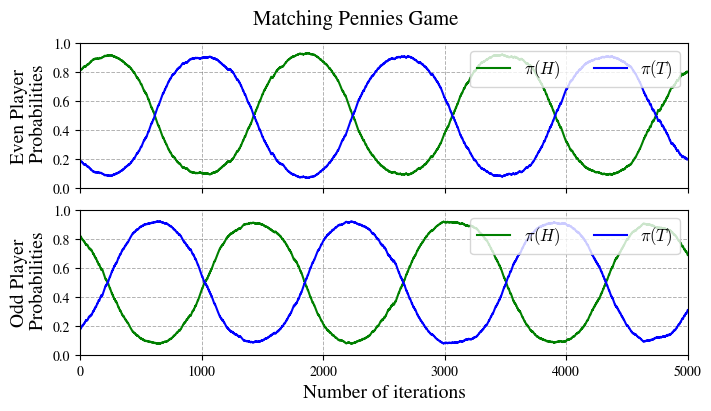

In [115]:
# Plot the results
fig , axes = plot_matching_pennies(Pdat)

# Save the plot
path = 'Plots/'
os.makedirs(path,exist_ok=True)
name = path + f'MatchingPennies_evolution.png'
fig.savefig(name,bbox_inches='tight',dpi=300)

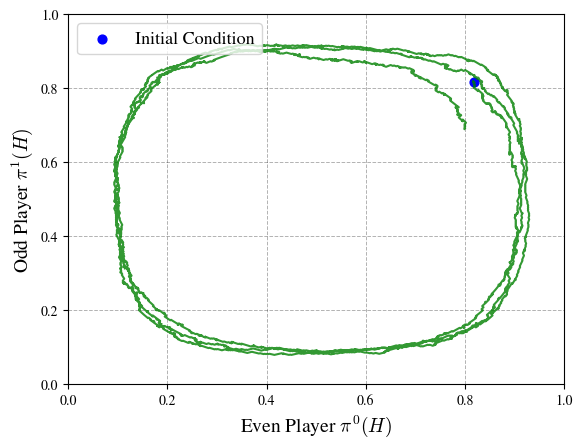

In [132]:
# Plot the trajectory in the (P0,P1) space
fig , axes = plot_matching_pennies_space(Pdat)

# Save the plot
path = 'Plots/'
os.makedirs(path,exist_ok=True)
name = path + f'MatchingPennies_space.png'
fig.savefig(name,bbox_inches='tight',dpi=300)

In [173]:
# We repeat the algorithm for different initial conditions

# Parameters of the optimization
N_steps = 30000
lr = 0.001
# Number of initial conditions
Nit = 10 
# List to save all the results
PDAT = []

# Loop over iterations
for i in range(Nit):
    print(f'Iteration {i}')
    # Initialization
    theta0 = [0.25*i,0]
    theta1 = [0.25*i,0]
    theta = [theta0,theta1]
    # Obtain the initial policies
    # P0 for *even* player
    # P1 for *odd* player
    P0 = get_policy(theta0)
    P1 = get_policy(theta1)
    P = [P0,P1]
    # Save the initial value
    Pdat = [np.array(P)]  
    
    # Loop for time
    for t in range(N_steps): 
        # Take actions
        At = [get_action(P[n],Na) for n in range(N)]
        # Observe rewards based on actions
        Rt = [R(n,At,r) for n in range(N)]
        # Update the parameters with natural gradient
        theta = update_param(N,At,Rt,theta,lr)
        # Update the policies
        P = [get_policy(theta[n]) for n in range(N)]
        # Save the parameters
        Pdat.append(np.array(P))
    # Convert the data list into an array
    PDAT.append(np.array(Pdat))

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9


In [174]:
# In this cell we save the data of several trials to compare them after side by side

Xdat = np.array(PDAT)
# Save the data
path = 'Data/'
os.makedirs(path,exist_ok=True)
for n in range(N): 
    name = path + f'match_penn_player{n}_lr{lr}.txt'
    # Save just the probability of H (0) for each agent n in the different conditions
    xn = Xdat[:,:,n,0]
    np.savetxt(name,xn)

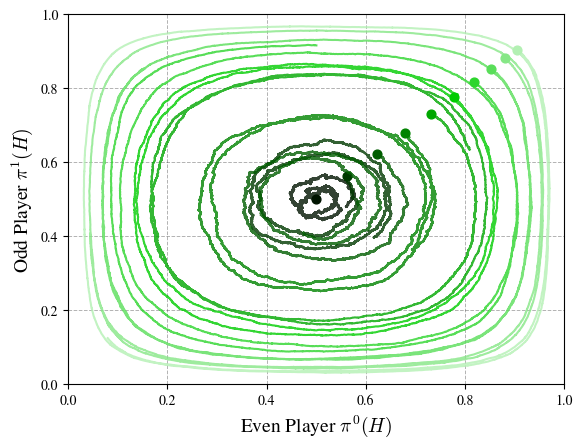

In [177]:
# Plot the result in (P0,P1) space
fig , axes = plot_matching_pennies_multi(PDAT)
# Save the plot
path = 'Plots/'
os.makedirs(path,exist_ok=True)
name = path + f'MatchingPennies_space_multi.png'
fig.savefig(name,bbox_inches='tight',dpi=300)

To compare the results obtained with natural policy gradient we first recall the replicator dynamics obtained in the continuos limit:

$\dfrac{d \pi^n(a)}{dt} = \pi^n(a) \left[u^n(a,\boldsymbol{\pi}^{-n}) - u^n(\boldsymbol{\pi}) \right]$      where      $u^n(a,\boldsymbol{\pi}^{-n}) = \displaystyle\sum_{\mathbf{a}_{-n}} r_n(a,\mathbf{a}_{-n}) \boldsymbol{\pi}^{-n}(\mathbf{a}_{-n})$     and     $u^n(\boldsymbol{\pi})=\displaystyle\sum_{a_n,\mathbf{a}_{-n}} r_n(a_n,\mathbf{a}_{-n}) \pi^n(a_n) \boldsymbol{\pi}^{-n}(\mathbf{a}_{-n})$

In the case of $2$ playes we just have $\pi^0 = \left(\pi^0 (a_1),\cdots,\pi^0(a_M) \right)^T$ and $\pi^1 = \left(\pi^1 (a_1),\cdots,\pi^1(a_M) \right)^T$ where $M = |\mathcal{A}|$ and the reward functions are just matrixes, therefore we can express the system of equations as: 

$\dfrac{d \pi^0}{dt} = \pi^0 \left[ r_0 \pi^1 - \pi^{0} \cdot r_0 \pi^1  \right]$  and  $\dfrac{d \pi^1}{dt} = \pi^1 \left[ r_1 \pi^0 - \pi^{1} \cdot r_1 \pi^0  \right]$

and this system of equations can be solved with a simple Euler integration.

In [214]:
# Integration of the Replicator Dynamics

# Payoff matrices
r0 = np.array([[1,-1],
              [-1,1]])
r1 = np.array([[-1,1],
              [1,-1]])
r = np.array([r0,r1])

# Parameters of the optimization
N_steps = 10000
lr = 0.001
# Number of initial conditions
Nit = 10
# List to save all the results
PDAT = []

# Loop over iterations
for i in range(Nit):
    print(f'Iteration {i}')
    # Initialization
    theta0 = [0.25*i,0]
    theta1 = [0.25*i,0]
    theta = [theta0,theta1]
    # Obtain the initial policies
    # P0 for *even* player
    # P1 for *odd* player
    P0 = get_policy(theta0)
    P1 = get_policy(theta1)
    P = [P0,P1]
    # Save the initial value
    Pdat = [np.array(P)]  
    # Loop over time
    for t in range(N_steps): 
        dP = derivative_p(P,r)
        P = P + lr*dP
        Pdat.append(P)
    PDAT.append(np.array(Pdat))

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9


In [216]:
# In this cell we save the data of several trials to compare them after side by side

Xdat = np.array(PDAT)
# Save the data
path = 'Data/'
os.makedirs(path,exist_ok=True)
for n in range(N): 
    name = path + f'RD_match_penn_player{n}_lr{lr}.txt'
    # Save just the probability of H (0) for each agent n in the different conditions
    xn = Xdat[:,:,n,0]
    np.savetxt(name,xn)

In [222]:
# Load the data
path = 'Data/'
Lr = [0.005,0.001,0.001]
PDAT = []
ex = ''
for i,lr in enumerate(Lr): 
    if i == 2: 
        ex = f'RD_'
    lr = Lr[i]
    n = 0
    name = path + ex +f'match_penn_player{n}_lr{lr}.txt'
    P0 = np.loadtxt(name)
    n = 1
    name = path + ex +f'match_penn_player{n}_lr{lr}.txt'
    P1 = np.loadtxt(name)
    P = np.array([P0,P1])
    PDAT.append(P)

(10, 6001) (10, 6001) (2, 10, 6001)
(10, 30001) (10, 30001) (2, 10, 30001)
(10, 10001) (10, 10001) (2, 10, 10001)


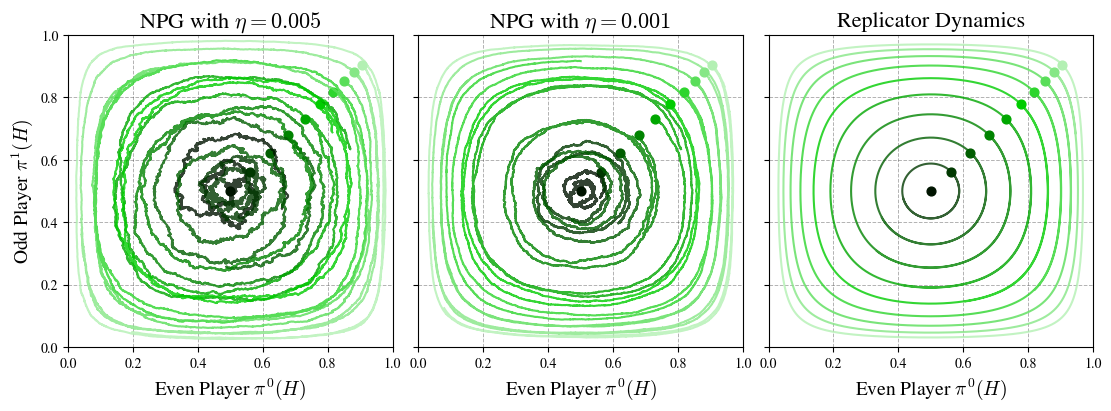

In [241]:
# Plot comparisson of Natural Policy Gradient and Replicator Dynamics    
fig, axes = plot_compare_RD(PDAT,Nit)

# Save the plot
path = 'Plots/'
os.makedirs(path,exist_ok=True)
name = path + f'MatchingPennies_space_RD.png'
fig.savefig(name,bbox_inches='tight',dpi=300)

## **Example: Prisoner's Dilemma**

The Prisoner's Dilemma is a classic example in Game Theory is a simple example of a zero sum game for two players. There are 2 possible actions ${H,T}$, if both players take the same action, the *even* player gets a reward while the *odd* player looses and the *odd* player wins if the actions are different. The payoff matrix for the game can be written as follows: 

\begin{equation}
\begin{array}{|c|c|c|}
\hline
&H&T\\
\hline
H&1,-1&-1,1\\
\hline
T&-1,1&1,-1\\
\hline
\end{array}
\end{equation}

where the columns correspond to the *even* player, and the rows to the *odd*.

This game has one Nash equilibrium in mixed strategies when $\pi^0 (H) = \pi^0 (T) = \pi^1(H)=\pi^1(T) = \dfrac{1}{2}$

# Extras

In [6]:
import mpltern

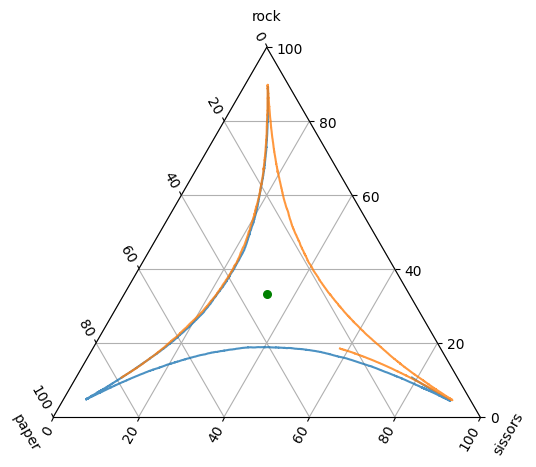

In [38]:
ax = plt.subplot(projection="ternary", ternary_sum=100.0)

ax.set_tlabel("rock")
ax.set_llabel("paper")
ax.set_rlabel("sissors")
n = 0
ax.grid()
t= P_save[:,n,0]
l= P_save[:,n,1]
r= P_save[:,n,2]
ax.plot(t,l,r,alpha=0.8)
n = 1
t= P_save[:,n,0]
l= P_save[:,n,1]
r= P_save[:,n,2]
ax.plot(t,l,r,alpha=0.8)
ax.scatter(0.33,0.33,0.33,s=30,color='green')

plt.show()

In [10]:
def derivative_p(p,r): 
    p0 , p1 = p[0],p[1]
    r0 , r1 = r[0],r[1]
    dp0 = p0*(np.matmul(r0,p1) - np.dot(p0,np.matmul(r0,p1)))
    dp1 = p1*(np.matmul(r1,p0) - np.dot(p1,np.matmul(r1,p0)))
    return np.array([dp0,dp1])

In [26]:
# Payoff matrices
# r0 = np.array([[-1,-3],
#               [0,-2]])
# r1 = np.array([[-1,0],
#               [-3,-2]])

r0 = np.array([[0,-1,1],
              [1,0,-1],
              [-1,1,0]])
# r0 = np.array([[1,-1],
#               [-1,1]])
r1 = -r0

r = np.array([r0,r1])
#Initialization
p0 = [1/3,1/3-0.01,1/3+0.01]
p1 = [1/3-0.01,1/3,0.01+1/3]
p = np.array([p0,p1])
p_init = p
N_steps = 10000
lr = 0.001

P_save = [p]
for t in range(N_steps): 
    dp = derivative_p(p,r)
    # print(dp.shape)
    p = p + lr*dp
    P_save.append(p)
P_save = np.array(P_save)
print(P_save.shape)

(10001, 2, 3)


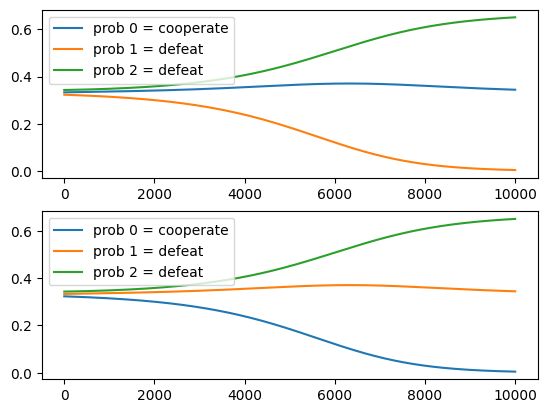

In [27]:
fig,axes = plt.subplots(nrows=N)
for n in range(N): 
    ax = axes[n]
    pn = P_save[:,n,:]
    ax.plot(pn[:,0],label='prob 0 = cooperate')
    ax.plot(pn[:,1],label='prob 1 = defeat')
    ax.plot(pn[:,2],label='prob 2 = defeat')
    ax.legend()


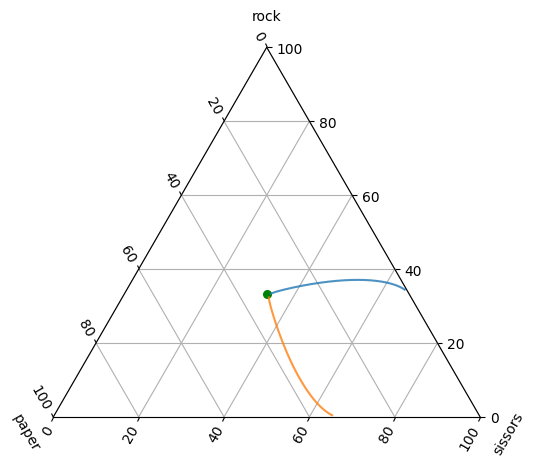

In [28]:
ax = plt.subplot(projection="ternary", ternary_sum=100.0)

ax.set_tlabel("rock")
ax.set_llabel("paper")
ax.set_rlabel("sissors")
n = 0
ax.grid()
t= P_save[:,n,0]
l= P_save[:,n,1]
r= P_save[:,n,2]
ax.plot(t,l,r,alpha=0.8)
n = 1
t= P_save[:,n,0]
l= P_save[:,n,1]
r= P_save[:,n,2]
ax.plot(t,l,r,alpha=0.8)
ax.scatter(0.33,0.33,0.33,s=30,color='green')

plt.show()

(0.0, 1.0)

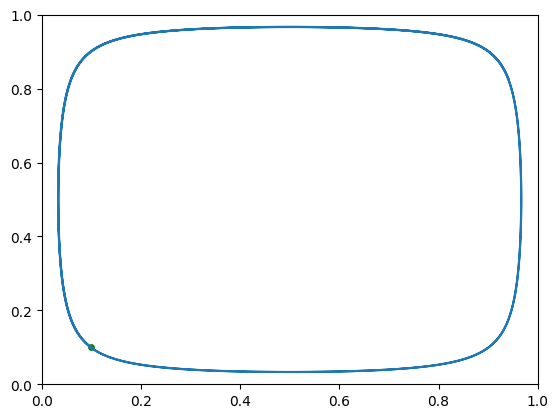

In [302]:
plt.scatter(p_init[0][0],p_init[1][0],color='green',s=15)
plt.plot(P_save[:,0,0],P_save[:,1,0])
plt.xlim(0,1)
plt.ylim(0,1)